In [1]:
import csv
a = []
with open('lab1.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))
num_attribute = len(a[0])-1 
print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)


[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'] 


Instance  2 is ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  3 is ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  4 is ['s

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv("lab1.csv")
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and genearal_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 
Specific Bundary after  1 Instance is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]





[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

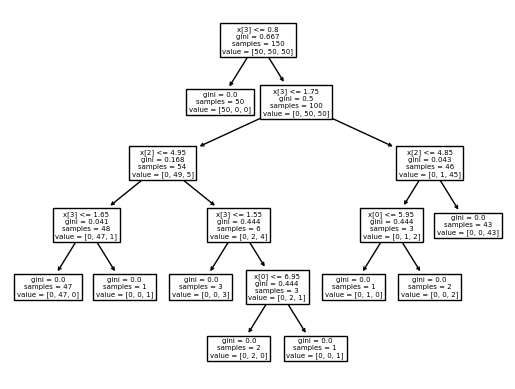

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf.fit(X, y)

plot_tree(clf)


Accuracy: 1.0


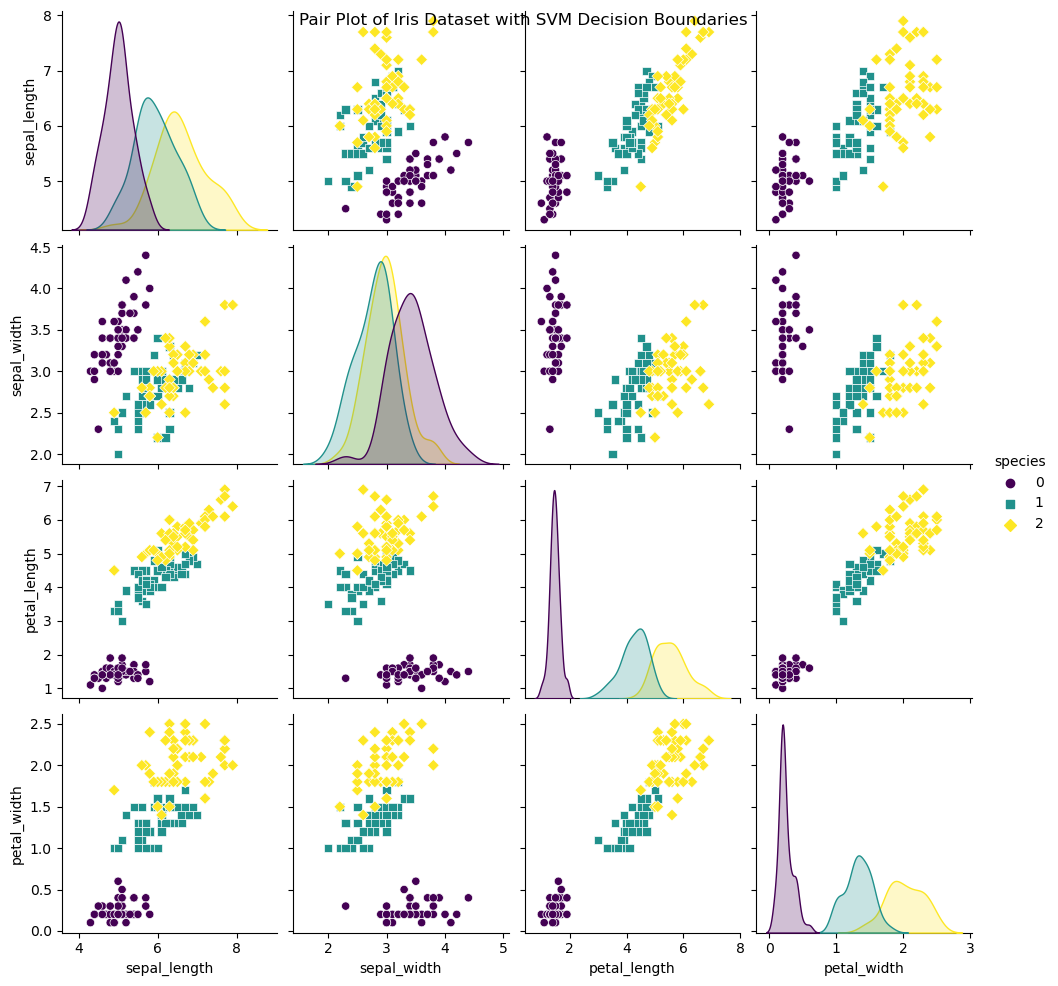

In [8]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

iris_df = sns.load_dataset('iris')
iris_df['species'] = iris_df['species'].astype('category').cat.codes

# Pair plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset with SVM Decision Boundaries')
plt.show()

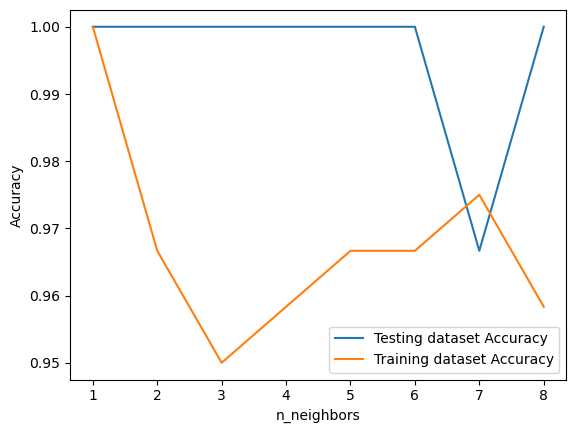

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()
X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
import numpy as np

def gaussian(x, mean, variance):
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean) ** 2 / (2 * variance))

def em_algorithm(data, num_clusters, num_iterations):
    np.random.seed(0)
    means = np.random.choice(data, num_clusters)
    variances = np.ones(num_clusters) * np.var(data)
    weights = np.ones(num_clusters) / num_clusters

    for _ in range(num_iterations):
        responsibilities = np.zeros((len(data), num_clusters))
        for i in range(len(data)):
            for k in range(num_clusters):
                responsibilities[i, k] = weights[k] * gaussian(data[i], means[k], variances[k])
            responsibilities[i] /= np.sum(responsibilities[i])

        for k in range(num_clusters):
            nk = np.sum(responsibilities[:, k])
            means[k] = np.sum(responsibilities[:, k] * data) / nk
            variances[k] = np.sum(responsibilities[:, k] * (data - means[k]) ** 2) / nk
            weights[k] = nk / len(data)

    return means, variances, weights

np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=10, scale=2, size=100)
data = np.concatenate((data1, data2))

num_clusters = 2
num_iterations = 100
estimated_means, estimated_variances, estimated_weights = em_algorithm(data, num_clusters, num_iterations)

print("Estimated means:", estimated_means)
print("Estimated variances:", estimated_variances)
print("Estimated weights:", estimated_weights)


Estimated means: [9.56217449 4.92647694]
Estimated variances: [6.13983966 0.87510946]
Estimated weights: [0.57929578 0.42070422]


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


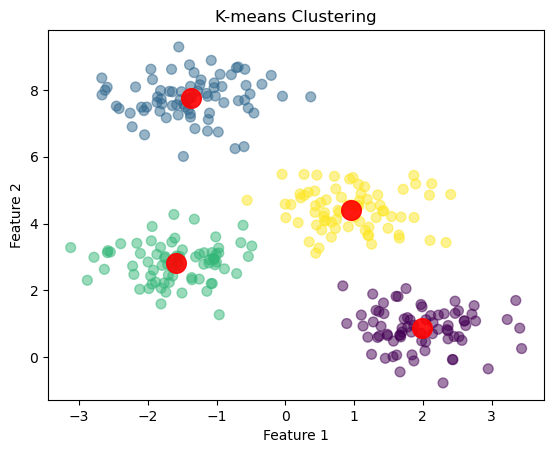

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [15]:
from itertools import combinations

def generate_candidate_itemsets(itemset, k):
    """
    Generate candidate itemsets of size k from the given itemset.
    """
    candidate_itemsets = set()
    for item1 in itemset:
        for item2 in itemset:
            if len(item1.union(item2)) == k:
                candidate_itemsets.add(item1.union(item2))
    return candidate_itemsets

def prune_itemsets(itemset, candidate_itemsets, min_support):
    """
    Prune the candidate itemsets that do not meet the minimum support threshold.
    """
    frequent_itemsets = set()
    item_counts = {}
    
    for transaction in transactions:
        for candidate in candidate_itemsets:
            if candidate.issubset(transaction):
                item_counts[candidate] = item_counts.get(candidate, 0) + 1

    for item, count in item_counts.items():
        support = count / len(transactions)
        if support >= min_support:
            frequent_itemsets.add(item)

    return frequent_itemsets

def apriori(transactions, min_support):
    """
    Apriori algorithm to find frequent itemsets.
    """
    itemset = set()
    for transaction in transactions:
        for item in transaction:
            itemset.add(frozenset([item]))

    k = 2
    frequent_itemsets = []
    while True:
        candidate_itemsets = generate_candidate_itemsets(itemset, k)
        frequent_itemsets_k = prune_itemsets(itemset, candidate_itemsets, min_support)
        if len(frequent_itemsets_k) == 0:
            break
        frequent_itemsets.append(frequent_itemsets_k)
        itemset = frequent_itemsets_k
        k += 1

    return frequent_itemsets

transactions = [
    {'bread', 'milk'},
    {'bread', 'diaper', 'beer', 'egg'},
    {'milk', 'diaper', 'beer', 'cola'},
    {'bread', 'milk', 'diaper', 'beer'},
    {'bread', 'milk', 'diaper', 'cola'}
]

min_support = 0.4

frequent_itemsets = apriori(transactions, min_support)

print("Frequent Itemsets:")
for k, itemsets in enumerate(frequent_itemsets, start=1):
    print(f"Size {k} frequent itemsets:")
    for itemset in itemsets:
        print(itemset)


Frequent Itemsets:
Size 1 frequent itemsets:
frozenset({'bread', 'milk'})
frozenset({'bread', 'diaper'})
frozenset({'diaper', 'cola'})
frozenset({'cola', 'milk'})
frozenset({'beer', 'milk'})
frozenset({'beer', 'bread'})
frozenset({'beer', 'diaper'})
frozenset({'diaper', 'milk'})
Size 2 frequent itemsets:
frozenset({'diaper', 'cola', 'milk'})
frozenset({'bread', 'diaper', 'milk'})
frozenset({'beer', 'diaper', 'milk'})
frozenset({'beer', 'bread', 'diaper'})


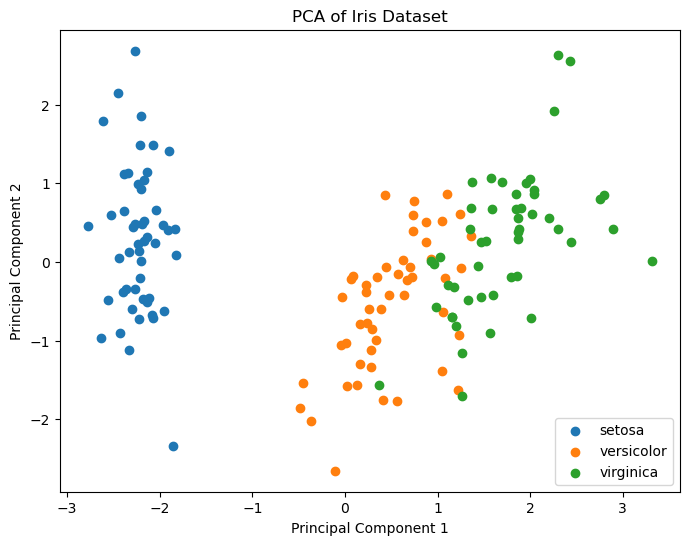

Explained Variance Ratio: [0.72962445 0.22850762]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(8, 6))
for target, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
